In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [592]:
import geometry
import poly_tools

In [824]:
reload(geometry)
reload(poly_tools);

In [826]:
from geometry import Point, Polygon, RegularPolygon, CircleList, RandomPolygon, RandomFlatShape
from poly_tools import plot_circle, plot_poly, find_radii

In [10]:
def plot_circumcenter(p, i, *args, **kwargs):
    c, r = p.points[i].circumcenter()
    plot_circle(c, r, *args, **kwargs)

In [11]:
def f_in_circle(c, r):
    @np.vectorize
    def in_circle(x, y):
        return (x - c.x)**2 + (y - c.y)**2 <= r**2
    return in_circle

def f_in_intersection(p):
    fs = [f_in_circle(*p.points[i].circumcenter()) for i in range(p.N)]
    def in_intersection(x, y):
        return np.all([f(x, y) for f in fs], axis=0)
    return in_intersection

In [362]:
np.sum(Zs, axis=0).max()

10.0

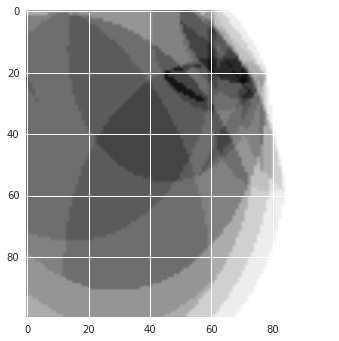

In [389]:
plt.imshow(np.sum(Zs, axis=0))

In [376]:
np.sum(Zs, axis=0).max(), K

(21.0, 50)

In [373]:
alls = np.zeros(Zs.shape[1:])
alls[np.all(Zs, axis=0) > 0] = 1

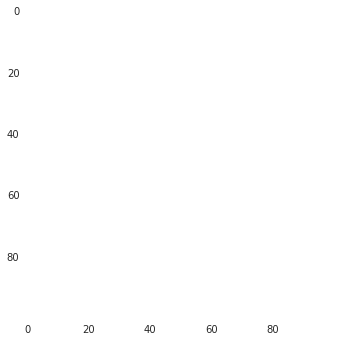

In [374]:
plt.imshow(alls)

In [242]:
plt.Circle(c, r, color='red')

In [102]:
Point(1, 0).cross(Point(0, -1))

-1.0

In [273]:
p = Polygon([(1, 0), (0, .5), (-.5, 0), (0, -.5)])

# DEMO
# DEMO
# DEMO

In [15]:
j = 0

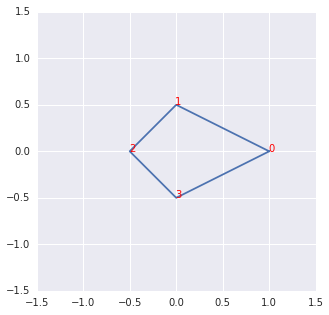

In [274]:
plot_poly(p, 1.5)
p = p.flip(int(np.random.random()* p.N))
j+=1

### With $N = 4$

In [200]:
p = RandomPolygon(5)

In [416]:
# QUADRILATERAL THAT IS UNBOUNDED
p = Polygon([(0, 1), (2, 0), (.5, 1), (1, 0)])

In [873]:
p = Polygon([(0, 0), (.5, 1), (4, 1), (.5, 2)])

In [880]:
p = Polygon([(0.00, 0.00), (0.50, 1.00), (1.50, -0.75), (0.50, 2.00)])

In [776]:
p = Polygon([(1, 0), (-3., -1), (1, 2), (.5, -1), (-1.5, .5)])

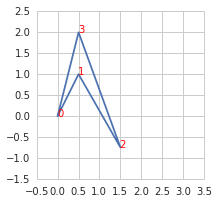

In [881]:
plot_poly(p, size=4, bisectors=False, xlim=(-.5, 3.5), ylim=(-1.5, 2.5), figsize=(3,3))

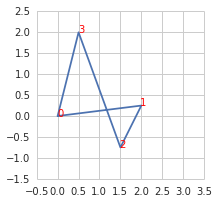

In [882]:
plot_poly(p.flip(1), size=4, bisectors=False, xlim=(-.5, 3.5), ylim=(-1.5, 2.5), figsize=(3,3))

In [883]:
p.flip(1).points

[(0.00, 0.00), (2.00, 0.25), (1.50, -0.75), (0.50, 2.00)]

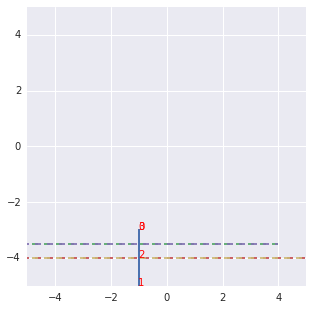

In [812]:
p = p.flip(1)
plot_poly(p, size=5)

In [407]:
p = Polygon([(1, .5), (1, 1), (.2, 1), (-1, 1), (-1, -.5), (-1, -1), ])

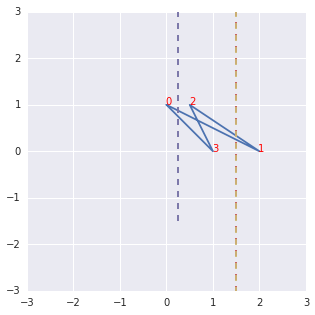

In [419]:
# p = RandomPolygon(4)
# p = p.flip(3)
plot_poly(p, 3)
# for (i, j) in [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]:
#     a, b = p.points[i], p.points[j]
#     z =  -5 * (b - a).rotate_90() + .5 * (b + a)
#     c = + .5 * (b + a) + 5 * (b - a).rotate_90()
# #     plt.plot([z.x, c.x ], (z.y, c.y))
zz = list(range(p.N))
for (i, j) in zip(zz, zz[2:] + zz[:2]):
    a, b = p.points[i], p.points[j]
    z =  -5 * (b - a).rotate_90() + .5 * (b + a)
    c = + .5 * (b + a) + 5 * (b - a).rotate_90()
    plt.plot([z.x, c.x ], (z.y, c.y), linestyle='--')
# plt.scatter([Xm], [Ym])

In [334]:
p = RandomPolygon(4)

In [291]:
k  =1

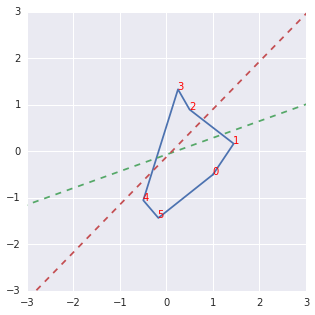

In [415]:
# p = RandomPolygon(4)
p = p.flip(k % p.N)
k += 1
plot_poly(p, 3)
# for (i, j) in [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]:
#     a, b = p.points[i], p.points[j]
#     z =  -5 * (b - a).rotate_90() + .5 * (b + a)
#     c = + .5 * (b + a) + 5 * (b - a).rotate_90()
# #     plt.plot([z.x, c.x ], (z.y, c.y))
for (i, j) in [ (0, 2), (1, 3),]:
    a, b = p.points[i], p.points[j]
    z =  -5 * (b - a).rotate_90() + .5 * (b + a)
    c = + .5 * (b + a) + 5 * (b - a).rotate_90()
    plt.plot([z.x, c.x ], (z.y, c.y), linestyle='--')
plt.scatter([Xm], [Ym])

In [356]:
p.angles() * 180 / np.pi

array([ 275.44033203,  213.45239179,   72.34987578,  158.7574004 ])

In [319]:
p.is_convex()

False

In [314]:
p = RandomPolygon(5)
i = 0
while i < 100000 and not p.is_convex():
    p = p.flip(int(np.random.random() * p.N))
    i += 1
i

100000

In [177]:
p = Polygon([(0, 0), (-1.1, -.5), (0, .2), (-.9, 1)])

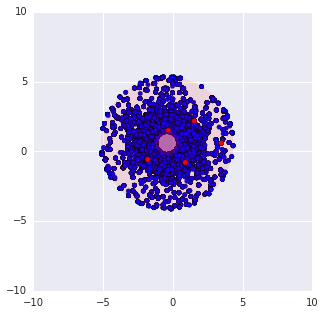

In [454]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(8000):
#     p = p.flip(j % p.N)#int(np.random.random() * 7))
    p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 10
plt.ylim((-win_size, win_size))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

### With $N = 5$

In [577]:
p = RandomPolygon(4)
p = Polygon([(1, .5), (-1, -1), (1, -.5), (-1, 1)])

In [ ]:
def center(p):
    

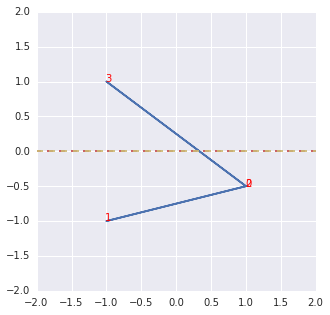

In [591]:
p = p.flip(j % 4)
j += 1
plot_poly(p, 2)

In [425]:
p = RandomFlatShape(10)

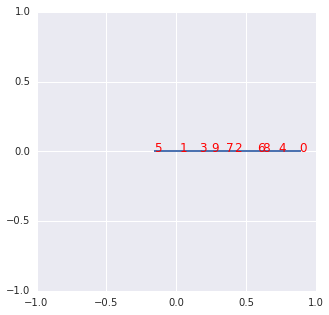

In [431]:
p = p.flip(j % p.N)
plot_poly(p, 1)

j-=1

In [ ]:
def find_radii(p, iters= 5000, plot=True):
    if plot:
        plt.figure(figsize=(5, 5))
    Xs = [] # list of all x coord of all vertices
    Ys = [] # list of all y coord of all vertices
    for i in range(iters): 
        p = p.flip(j % p.N) # flip in sequence 
#         p = p.flip(int(np.random.random() * len(p))) #flip randomly
        j += 1
        x, y = p.scatter()
        Xs += x
        Ys += y
        if plot:
            plt.scatter(x, y)
            
    # find center my taking mean
    Xm, Ym = np.mean(Xs), np.mean(Ys) 
    
    # find all distance^2 to middle
    ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])
    r_min = ds[0]**.5 
    r_max = ds[-1]**.5
    center = (Xm, Ym)
    
    if plot:
        x, y = p.scatter()
        plt.scatter(x, y, color='red')
        win_size = 8
        plt.ylim((-win_size, win_size))
        plt.xlim((-win_size, win_size))
        plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
        plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)
        plt.show()
        
    print "CENTER:", center
    print "R_MIN: ", r_min
    print "R_MAX: ", r_max
    return center, r_min, r_max

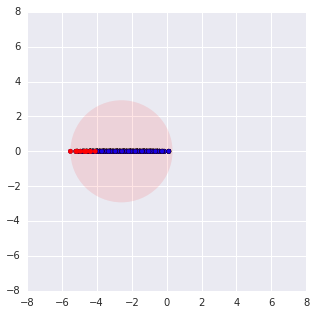

In [434]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(100):
    p = p.flip(j % p.N)#int(np.random.random() * 7))
#     p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 8
plt.ylim((-win_size, win_size))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

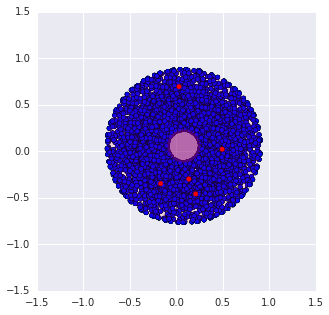

In [597]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(5000):
    p = p.flip(j % p.N)#int(np.random.random() * 7))
#     p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 1.5
plt.ylim((-win_size, win_size))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

### This one walks almost??? in a straight line

        [(-1, 1), (1, 1), (0, 1), (0, -1), (1, -1), (-1, 1)]

In [889]:
p = Polygon([(-1, 1), (1, 1), (0, 1), (0, -1), (1, -1)])

In [15]:
j  =0

In [39]:
# lefts = np.zeros(10000)
for i in range(100000):
    p = p.flip(j %p.N)
    if abs(min([z.x for z in p.points]) - np.min(lefts)) < 1e-14:
        break
    

In [57]:
min(lefts)

-2.1322414972510511

In [258]:
np.min(lefts[10:])

-1.0062511889361998

In [267]:
lefts = np.zeros(10000)
for i in range(120):
    p = p.flip(j %p.N)
    # plot_poly(p, 2)
    lefts[i] = min([z.x for z in p.points]) - np.min(lefts)
    j+=1

In [270]:
for i in range(p.N):
    p.points[i].y -= 5.

In [525]:
(p.points[3 ] - p.points[0]).dot(p.points[1 ] - p.points[3])

2.220446049250313e-16

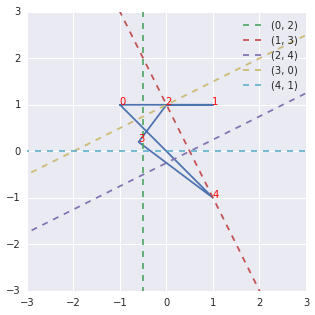

In [523]:
p = p.flip(j % p.N)
j+=1
plot_poly(p, 3, legend=True)

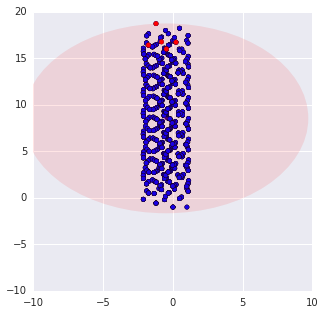

In [921]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(500):
    p = p.flip(j % p.N)#int(np.random.random() * 7))
#     p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 10
plt.ylim((-10, 20))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

# plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
# plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

In [575]:
np.mean([z.x for z in p.points])

-0.74320678447326749

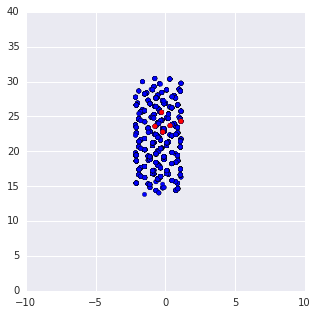

In [922]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(1000):
#     p = p.flip(j % p.N)#int(np.random.random() * 7))
    p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 10
plt.ylim((0, 40))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

# plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
# plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

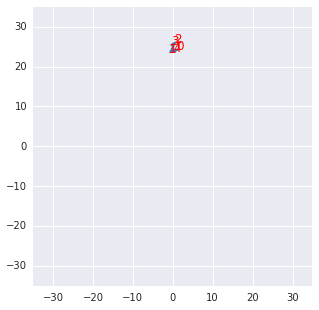

In [924]:
plot_poly(p, 35)
p = p.flip(j % p.N)
j += 1

### These points have no inner radius

        [(-1, 1), (1, 1), (0, 1), (0, -1), (1, -1), (-1, -1)]

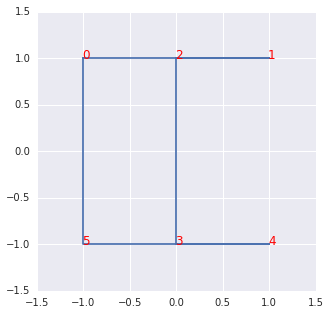

In [600]:
p = Polygon([(-1, 1), (1, 1), (0, 1), (0, -1), (1, -1), (-1, -1)])
plot_poly(p, 1.5)

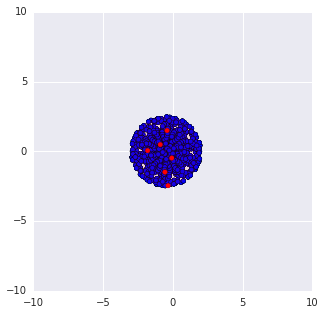

In [568]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(1000):
    p = p.flip(j % p.N)#int(np.random.random() * 7))
#     p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 10
plt.ylim((-win_size, win_size))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

In [569]:
ds[0], ds[-1]

(0.00094587089373533544, 6.2457827530862868)

These points walk around in a circle!!!!!

       [(1.70, 4.49), (1.65, 4.34), (2.18, 4.39), (2.61, 3.99), (1.16, 4.59)]

In [735]:
j

1000

p = Polygon([(0.09, 0.07), (-0.75, 0.03), (-0.31, -0.44), (0.28, 0.62), (-0.02, -0.07), (0.82, -0.37), (0.08, -0.74), (0.21, 0.08)])

In [954]:
p = Polygon([(0.09, 0.07), (-0.75, 0.03), (-0.31, -0.44), (0.28, 0.62), (-0.02, -0.07), (0.82, -0.37), (0.08, -0.74), (0.21, 0.08)])

In [655]:
p = Polygon([(-0.27, 0.94), (0.65, -0.64), (-0.01, 0.73), (-0.57, 0.59), (0.67, 0.51), (-0.15, 0.34)])

In [663]:
p = Polygon([(0.03, 0.81), (0.49, -0.11), (-0.50, 0.42), (-0.56, -0.68), (0.47, 0.13), (-0.87, -0.20)])

In [910]:
p = Polygon([(-0.62, 0.37), (-0.33, -0.24), (0.38, 0.73), (-0.43, 0.27), (-0.59, 0.73), (0.47, -0.11), (0.61, 0.53), (-0.53, -0.19)])

p = Polygon([(-0.79, 0.42), (-0.32, -0.54), (-0.16, -0.88), (-0.69, 0.69), (-0.92, -0.06), (0.58, 0.14), (0.51, 0.21), (-0.88, 0.36)])

In [947]:
p = Polygon([ (-0.88, 0.36), (-0.79, 0.42), (-0.32, -0.54), (-0.16, -0.88), (-0.69, 0.69), (-0.92, -0.06), (0.58, 0.14), (0.51, 0.21)])

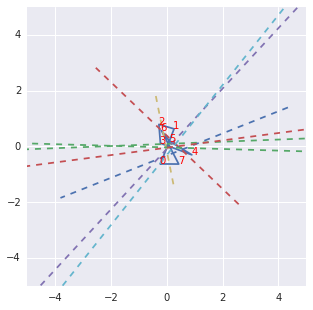

In [681]:
# p = Polygon([(1.70, 4.49), (1.65, 4.34), (2.18, 4.39), (2.61, 3.99), (1.16, 4.59)])
p = p.flip(j % p.N)
j += 1
plot_poly(p, 5)

In [974]:
p = Polygon([(0.09, 0.07), (-0.75, 0.03), (-0.31, -0.44), (0.28, 0.62), (-0.02, -0.07), (0.82, -0.37), (0.08, -0.74), (0.21, 0.08)])

In [1006]:
p = Polygon([(-0.79, 0.42), (-0.32, -0.54), (-0.16, -0.88), (-0.69, 0.69), (-0.92, -0.06), (0.58, 0.14), (0.51, 0.21), (-0.88, 0.36)])

In [1007]:
j = 0

In [1008]:
# plt.figure(figsize=(5, 5))
T = 50000
Xs = np.zeros((T, p.N))
Ys = np.zeros((T, p.N))
for i in range(T):
    p = p.flip(j % p.N)#int(np.random.random() * 7))
#     p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs[i] = x
    Ys[i] = y
#     plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
# x, y = p.scatter()
# plt.scatter(x, y, color='red')
# win_size = 2
# plt.ylim((-win_size, win_size))
# plt.xlim((-win_size, win_size))
# Xm, Ym = np.mean(Xs), np.mean(Ys)
# ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

# plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
# plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

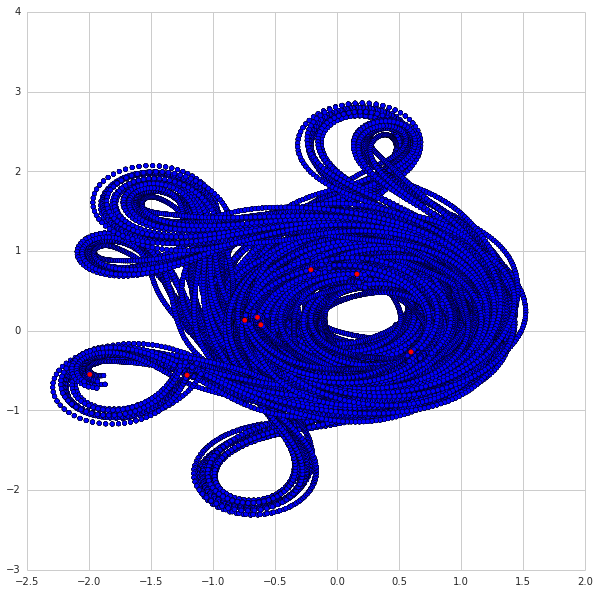

In [1009]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys)
# plt.scatter(X_mat[:, 1], Y_mat[:, 1])
x, y = p.scatter()
plt.scatter(x, y, color='red')
# plt.ylim(-20, 20)
# plt.xlim(-3, 2)

In [702]:
import json

In [709]:
# with open("serpent.json", "wb") as f:
#     json.dump( {"P":[(a.x, a.y) for a in p.points],"j" : j,"X":Xs, "Y":Ys}, f)

In [714]:
p.N

8

In [746]:
X_mat = np.array(Xs).reshape((len(Xs) / p.N, p.N))
Y_mat = np.array(Ys).reshape((len(Xs) / p.N, p.N))

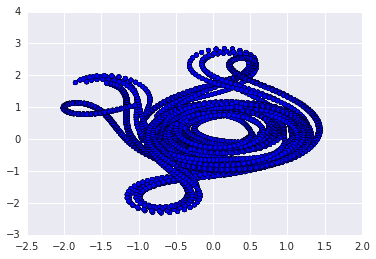

In [762]:
Xs.shape

(50000, 8)

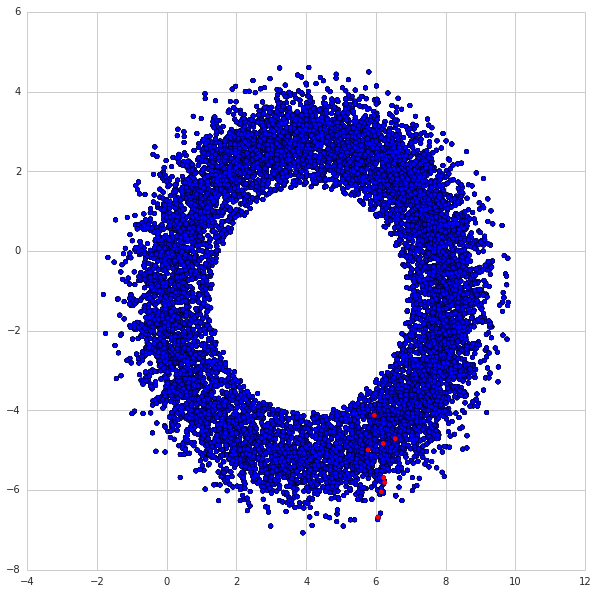

In [959]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys)
# plt.scatter(X_mat[:, 1], Y_mat[:, 1])
x, y = p.scatter()
plt.scatter(x, y, color='red')
# plt.ylim(-20, 20)
# plt.xlim(-3, 2)

(-3, 6)

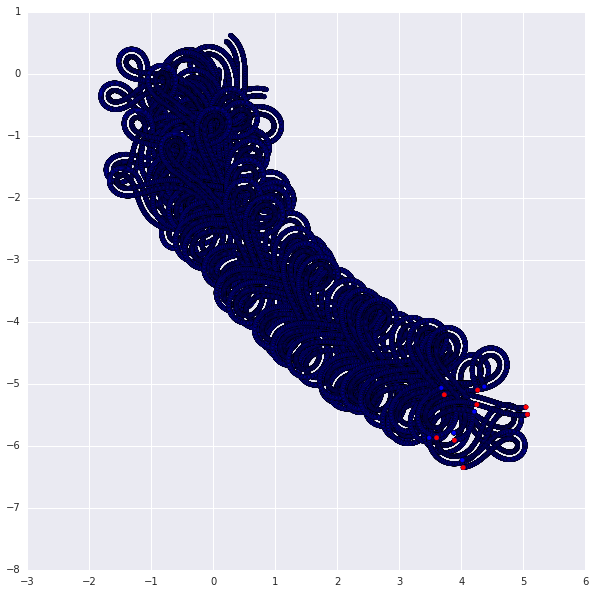

In [764]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys)
# plt.scatter(X_mat[:, 1], Y_mat[:, 1])
x, y = p.scatter()
plt.scatter(x, y, color='red')
plt.ylim(-8, 1)
plt.xlim(-3, 6)

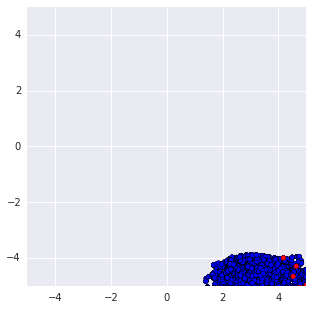

In [660]:
plt.figure(figsize=(5, 5))
Xs = []
Ys = []
for i in range(1000):
#     p = p.flip(j % p.N)#int(np.random.random() * 7))
    p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    Xs += x
    Ys += y
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
win_size = 5
plt.ylim((-win_size, win_size))
plt.xlim((-win_size, win_size))
Xm, Ym = np.mean(Xs), np.mean(Ys)
ds = sorted([(Xs[i] - Xm)**2 + (Ys[i] - Ym)**2 for i in range(len(Xs))])

# plot_circle(Point(Xm, Ym), ds[-1]**.5, color='red', alpha=.1, linewidth=0)
# plot_circle(Point(Xm, Ym), ds[0]**.5, color='purple', alpha=.5)

In [409]:
ds = sorted([(i, (Xs[i] - Xm)**2 + (Ys[i] - Ym)**2) for i in range(len(Xs))])

In [413]:
(Xs[4444]-Xm)**2 + (Ys[4444]-Ym)**2

0.080632312275766629

In [411]:
sorted(ds, key=lambda x: x[1])

[(4444, 0.080632312275766629),
 (12775, 0.081408101933161961),
 (12780, 0.081408101933161961),
 (12785, 0.081408101933161961),
 (12675, 0.081408101933162128),
 (12680, 0.081408101933162128),
 (12685, 0.081408101933162128),
 (12690, 0.081408101933162128),
 (12695, 0.081408101933162128),
 (12700, 0.081408101933162128),
 (12705, 0.081408101933162128),
 (12710, 0.081408101933162128),
 (12715, 0.081408101933162128),
 (12720, 0.081408101933162128),
 (23718, 0.082502013634924418),
 (23723, 0.082502013634924418),
 (23728, 0.082502013634924418),
 (23733, 0.082502013634924418),
 (23738, 0.082502013634924418),
 (23628, 0.082502013634924432),
 (23633, 0.082502013634924432),
 (23638, 0.082502013634924432),
 (23643, 0.082502013634924432),
 (23648, 0.082502013634924432),
 (23653, 0.082502013634924432),
 (23658, 0.082502013634924432),
 (23663, 0.082502013634924432),
 (23668, 0.082502013634924432),
 (23673, 0.082502013634924432),
 (23678, 0.082502013634924432),
 (23683, 0.082502013634924432),
 (23688, 

In [402]:
ds[0], ds[-1]

(0.086275486209954427, 1.0617259427326513)

# 1. Equal "area"
# 2. Equal set of side lengths $\{l_1, l_2, l_3...l_n\}$
# 3. ????

## 1 & 2 & 3 --> Some path of flips exists from shape 1 to shape 2

In [2926]:
np.mean(x), np.mean(y)

(-0.13444950650771734, 0.056836115678382593)

In [2530]:
# plt.figure(figsize=(5, 5))
T = 10000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    p = RandomPolygon(10)
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)

(array([  3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   1.00000000e+01,   7.00000000e+00,
          1.50000000e+01,   1.90000000e+01,   1.20000000e+01,
          1.60000000e+01,   2.70000000e+01,   1.70000000e+01,
          2.20000000e+01,   2.20000000e+01,   2.80000000e+01,
          3.20000000e+01,   3.70000000e+01,   5.40000000e+01,
          3.60000000e+01,   7.00000000e+01,   7.40000000e+01,
          9.20000000e+01,   8.70000000e+01,   1.20000000e+02,
          1.31000000e+02,   1.41000000e+02,   1.77000000e+02,
          1.65000000e+02,   2.08000000e+02,   2.32000000e+02,
          2.58000000e+02,   2.83000000e+02,   3.03000000e+02,
          4.06000000e+02,   4.30000000e+02,   4.39000000e+02,
          5.15000000e+02,   5.74000000e+02,   6.16000000e+02,
          6.84000000e+02,   7.76000000e+02,   8.43000000e+02,
        

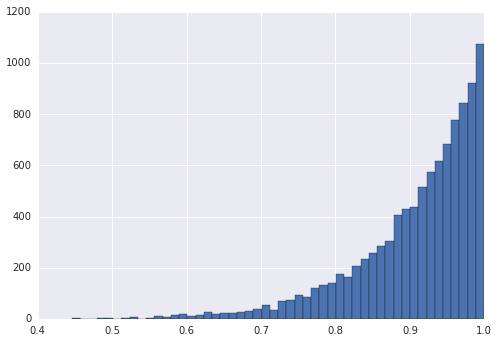

In [2529]:
plt.hist(np.sqrt(max_rs), bins=50);

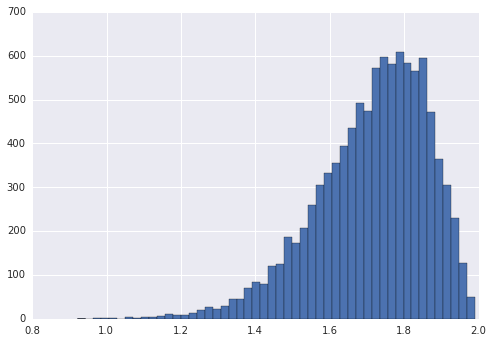

In [2532]:
plt.hist(np.sqrt(max_ds), bins=50);

In [2515]:
# plt.figure(figsize=(5, 5))
T = 5000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    r = np.random.random()
#     j = int(r *  len(p)) 
    j = i % len(p) 
    p = p.flip(j)
#     x, y = p.scatter()
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)
#     plt.scatter(x, y, alpha=.1)
max_d = np.sqrt(max_ds.max())
max_r = np.sqrt(max_rs.max())
min_r = np.sqrt(min_rs.min())

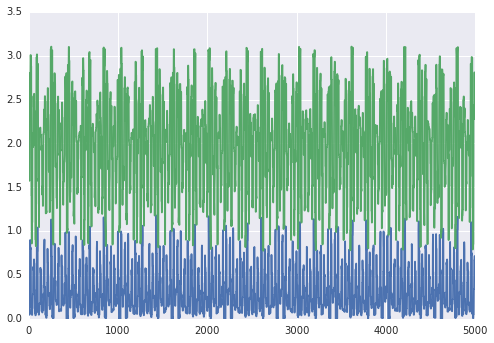

In [2516]:
plt.plot(min_rs)
plt.plot(max_rs)

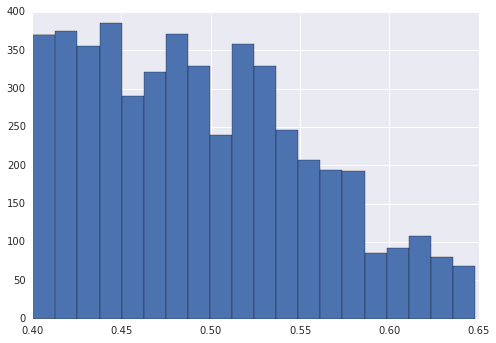

In [2507]:
plt.hist(min_rs, bins=20);

In [2517]:
min_r, max_r, max_d

(0.0096877082553496075, 1.7618303933293926, 2.2071145991856769)

In [2518]:
min_r**.5, max_r**.5, max_d**.5

(0.098426156357695929, 1.3273395923159199, 1.4856360924485097)